In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('/content/green_tech_data.csv')

In [ ]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


sustainability
0    85
1    15
Name: count, dtype: int64


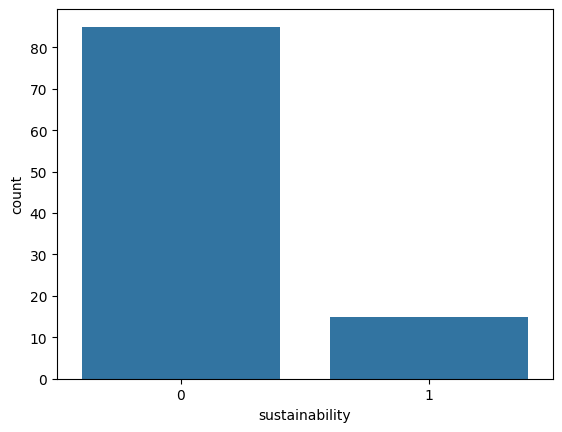

In [ ]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

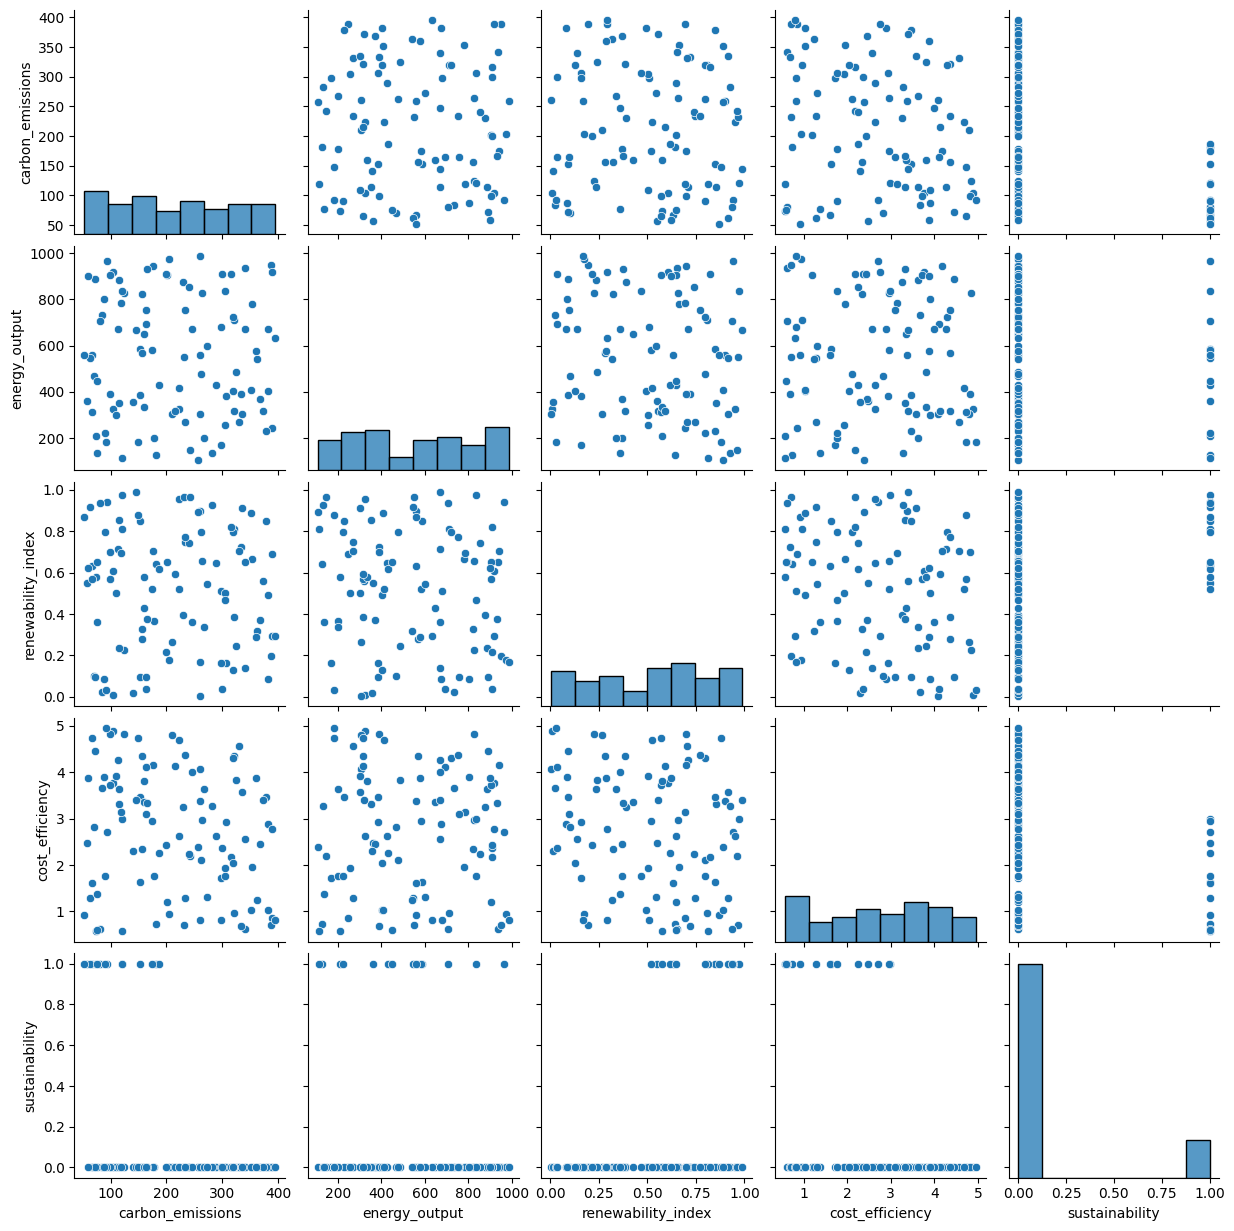

In [ ]:
sns.pairplot(data)
plt.show()

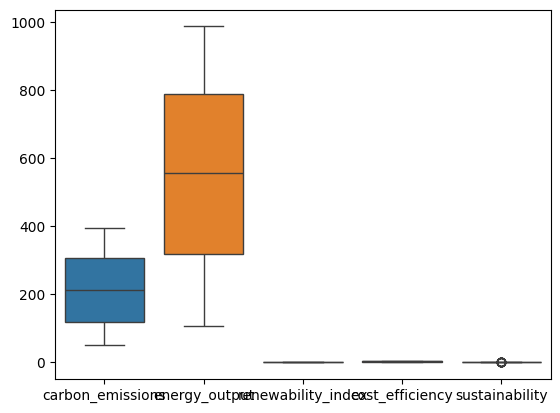

In [ ]:
sns.boxplot(data)
plt.show()

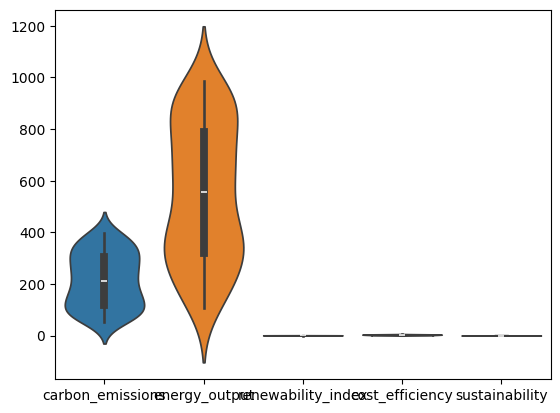

In [ ]:
sns.violinplot(data)
plt.show()

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')
Column 'carbon_emission' not found in the dataset.


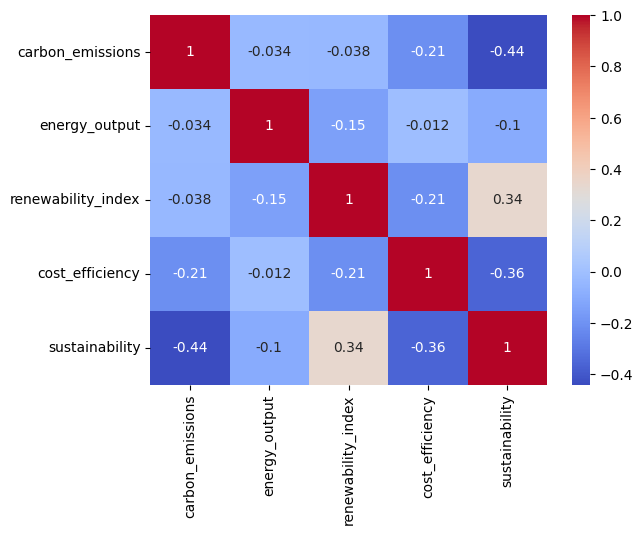

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("green_tech_data.csv")

# Print the column names to verify the exact column name for 'carbon_emission'
print(df.columns)

# Check if 'carbon_emission' exists and convert to categorical codes
if 'carbon_emission' in df.columns:
    df['carbon_emission'] = df['carbon_emission'].astype('category').cat.codes
else:
    print("Column 'carbon_emission' not found in the dataset.")

# Calculate the correlation matrix for numerical columns
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [ ]:
#example feature selection
X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability'] #target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_test.head()

,sustainability
83,0
53,0
70,0
45,0
44,0


In [ ]:
print("Slope: ",model.coef_)
print("y-intercept: ",model.intercept_)

Slope:  [[-0.01779072  0.71293208 -1.23085701]]
y-intercept:  [3.76490006]


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 95.00%


sustainability
0    85
1    15
Name: count, dtype: int64


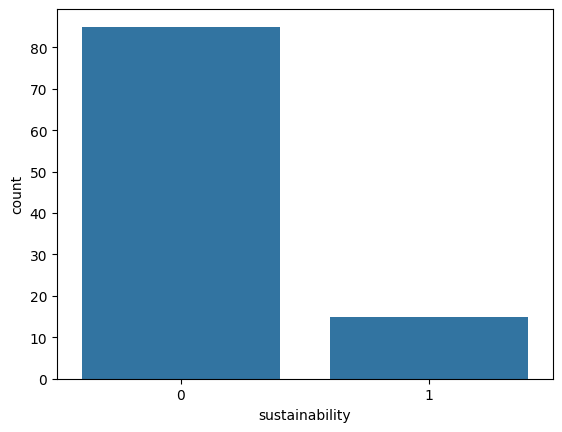

In [ ]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred,target_names=['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [ ]:
coefficients=pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


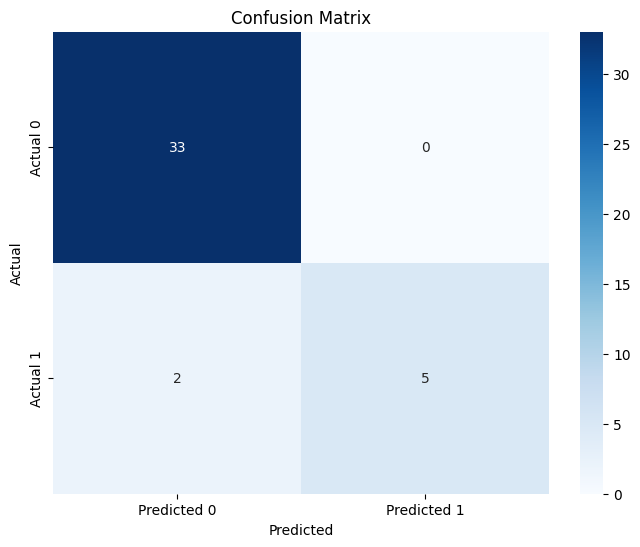

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [ ]:
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
